In [1]:
from sklearn.datasets import fetch_california_housing

# Load the dataset
california_housing = fetch_california_housing()

# Get the features and target variable
x= california_housing.data
y = california_housing.target

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
##train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(
    x,y,test_size=0.30,random_state=42)

In [4]:
x_train

array([[   4.1312    ,   35.        ,    5.88235294, ...,    2.98529412,
          33.93      , -118.02      ],
       [   2.8631    ,   20.        ,    4.40120968, ...,    2.0141129 ,
          32.79      , -117.09      ],
       [   4.2026    ,   24.        ,    5.61754386, ...,    2.56491228,
          34.59      , -120.14      ],
       ...,
       [   2.9344    ,   36.        ,    3.98671727, ...,    3.33206831,
          34.03      , -118.38      ],
       [   5.7192    ,   15.        ,    6.39534884, ...,    3.17889088,
          37.58      , -121.96      ],
       [   2.5755    ,   52.        ,    3.40257649, ...,    2.10869565,
          37.77      , -122.42      ]])

In [5]:
# LR implement
#gradient descent ->data standerize=True,standard scalar->
#standerizing the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [6]:
x_train=scaler.fit_transform(x_train)

In [7]:
x_test=scaler.transform(x_test)

In [8]:
#the value is chanded to come back previous point the [scaler.inverse_transform(x_train)] is used
x_train

array([[ 0.13350629,  0.50935748,  0.18106017, ..., -0.01082519,
        -0.80568191,  0.78093406],
       [-0.53221805, -0.67987313, -0.42262953, ..., -0.08931585,
        -1.33947268,  1.24526986],
       [ 0.1709897 , -0.36274497,  0.07312833, ..., -0.04480037,
        -0.49664515, -0.27755183],
       ...,
       [-0.49478713,  0.58863952, -0.59156984, ...,  0.01720102,
        -0.75885816,  0.60119118],
       [ 0.96717102, -1.07628333,  0.39014889, ...,  0.00482125,
         0.90338501, -1.18625198],
       [-0.68320166,  1.85715216, -0.82965604, ..., -0.0816717 ,
         0.99235014, -1.41592345]])

In [9]:
scaler.inverse_transform(x_train)

array([[   4.1312    ,   35.        ,    5.88235294, ...,    2.98529412,
          33.93      , -118.02      ],
       [   2.8631    ,   20.        ,    4.40120968, ...,    2.0141129 ,
          32.79      , -117.09      ],
       [   4.2026    ,   24.        ,    5.61754386, ...,    2.56491228,
          34.59      , -120.14      ],
       ...,
       [   2.9344    ,   36.        ,    3.98671727, ...,    3.33206831,
          34.03      , -118.38      ],
       [   5.7192    ,   15.        ,    6.39534884, ...,    3.17889088,
          37.58      , -121.96      ],
       [   2.5755    ,   52.        ,    3.40257649, ...,    2.10869565,
          37.77      , -122.42      ]])

In [10]:
from sklearn.linear_model import LinearRegression
##cross validation
from sklearn.model_selection import cross_val_score

In [11]:
regession=LinearRegression()

In [12]:
#mean squared error
mse=cross_val_score(regession,x_train,y_train,scoring='neg_mean_squared_error',cv=7)

In [13]:
#mean kam se kam hoona chiyea [mse=predicted-truth value]
np.mean(mse)

-0.5277543425205264

In [14]:
regession.fit(x_train,y_train)

LinearRegression()

In [15]:
#prediction
reg_pre=regession.predict(x_test)

In [16]:
reg_pre

array([0.72604907, 1.76743383, 2.71092161, ..., 2.07465531, 1.57371395,
       1.82744133])

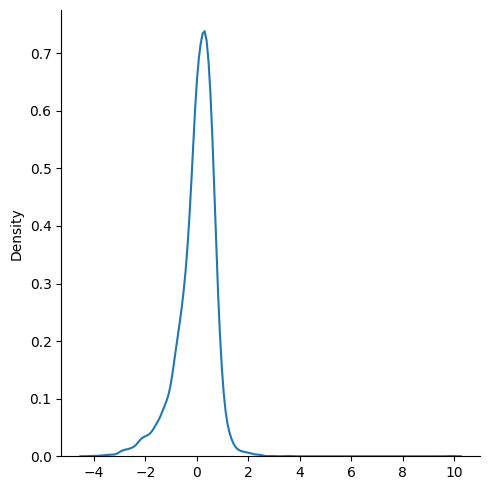

In [17]:
#to verify the above value is right or not so ue compare with truth valre i.e y_test
import seaborn as sns
sns.displot(reg_pre-y_test,kind='kde')

In [18]:
from sklearn.metrics import r2_score

In [39]:
scr=r2_score(reg_pre,y_test)
scr

0.34513393809439863

    ##Ridge Regression Algorithm
    remove overfitting 
    alpha->hyper parameter tunning(select perfect parameter)
    2. gridsearchcv

In [19]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [20]:
ridge_regressor=Ridge()

In [21]:
ridge_regressor

Ridge()

In [24]:
parameter={'alpha':[1,2,3,5,10,20,30,40,50,60,70,80,90,100]}
ridgecv=GridSearchCV(ridge_regressor,parameter,cv=5)
ridgecv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 3, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90, 100]})

In [26]:
print(ridgecv.best_params_)
print(ridgecv.best_score_)

{'alpha': 5}
0.6065884845172649


In [27]:
ridge_red=ridgecv.predict(x_test)

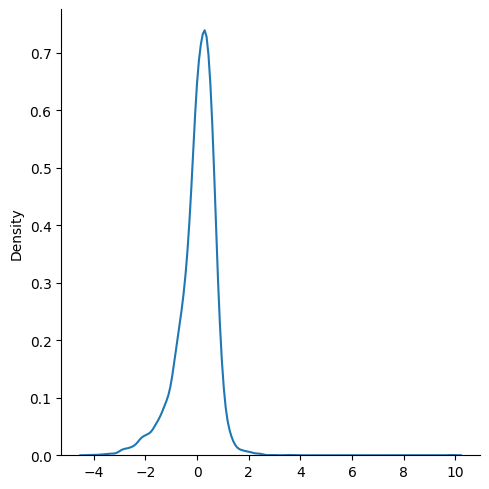

In [28]:
import seaborn as sns
sns.displot(ridge_red-y_test,kind='kde')

In [29]:
scr=r2_score(ridge_red,y_test)
scr

0.3438394544140445

## Lasso Regression

In [30]:
from sklearn.linear_model import Lasso

In [31]:
lasso=Lasso()

In [32]:
parameter={'alpha':[1,2,3,5,10,20,30,40,50,60,70,80,90,100]}
lassocv=GridSearchCV(lasso,parameter,cv=5)
lassocv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 3, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90, 100]})

In [33]:
print(lassocv.best_params_)
print(lassocv.best_score_)
print(lassocv.best_estimator_)

{'alpha': 1}
-0.0006416906415077417
Lasso(alpha=1)


In [35]:
laso_predict=lassocv.predict(x_test)
laso_predict

array([2.06923961, 2.06923961, 2.06923961, ..., 2.06923961, 2.06923961,
       2.06923961])

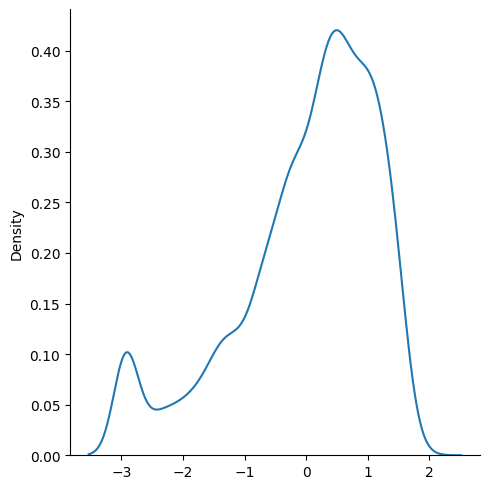

In [36]:
import seaborn as sns
sns.displot(laso_predict-y_test,kind='kde')

In [37]:
scr=r2_score(reg_pre,y_test)
scr

0.34513393809439863

In [2]:
from sklearn.linear_model import LogisticRegression

In [3]:
from sklearn.datasets import load_breast_cancer

In [10]:
df=load_breast_cancer()

In [12]:
dataset=pd.DataFrame(df.data)

In [13]:
dataset.columns=df.feature_names

In [14]:
dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [18]:
x=dataset
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [19]:
y=pd.DataFrame(df['target'],columns=["Target"])
y

,Target
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [20]:
#check y is balanced or not
y['Target'].value_counts()

Target
1    357
0    212
Name: count, dtype: int64

In [22]:
#Tarin and Test Spit
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(
x,y,test_size=0.30,random_state=42)

In [23]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()

In [24]:
#hyper parameter tunning
from sklearn.model_selection import GridSearchCV
#parameter={'penalty':['l1','l2','elasticnet'],'c':[1,2,3,4,5,6,10,20,30],'max_iter':[100,150]}

In [28]:

parameter={'C':[1,5,10],'max_iter':[100,150]}

In [29]:
MODEL1=LogisticRegression(C=100,max_iter=100)

In [31]:
model=GridSearchCV(MODEL1,param_grid=parameter,scoring='f1',cv=5)

In [32]:
model.fit(x_train,y_train)

C:\Users\ankus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ankus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ankus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed w

GridSearchCV(cv=5, estimator=LogisticRegression(C=100),
             param_grid={'C': [1, 5, 10], 'max_iter': [100, 150]},
             scoring='f1')

In [33]:
model.best_params_

{'C': 5, 'max_iter': 100}

In [34]:
model.best_score_

0.9640321430201272

In [35]:
y_pre=model.predict(x_test)

In [36]:
y_pre

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1])

In [37]:
#confusion matrix
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score


In [38]:
confusion_matrix(y_test,y_pre)

array([[ 59,   4],
       [  1, 107]], dtype=int64)

In [39]:
accuracy_score(y_test,y_pre)

0.9707602339181286

In [40]:
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



#practice

In [42]:
parameter={'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30],'max_iter':[100,200,300]}

In [43]:
classifier_regressor=GridSearchCV(classifier,param_grid=parameter,scoring='accuracy',cv=5)

In [44]:
classifier_regressor.fit(x_train,y_train)

C:\Users\ankus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ankus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ankus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed w

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [46]:
classifier_regressor.best_params_

{'C': 30, 'max_iter': 200, 'penalty': 'l2'}

In [47]:

classifier_regressor.best_score_

0.9596835443037974

In [48]:
y_pre=classifier_regressor.predict(x_test)

In [49]:
#accuracy score
score=accuracy_score(y_pre,y_test)

In [50]:
score

0.9707602339181286